# 1. 因果探索のサンプル
- ベイズ推論を使ってパラメータ間の因果関係を探索します
- パラメータやデータ数など、本当は細かい調整が必要です  
- 詳細
    - https://qiita.com/YuyaOmori/items/e051f0360d1f9562620b

In [1]:
from pgmpy.estimators import ConstraintBasedEstimator
import pandas as pd


In [2]:
#データ読み込み
df=pd.read_csv("muki.csv")
df

,name,polytyp,Tc,ref,author,link,comment,polytyp2,C_R,C_T,vol_per_atom,Z,f4,d5,L4f,S4f,J4f,(g-1)J4f,(2-g)J4f
0,Ce2Co17,Th2Zn17,1100.0,"JOURNAL OF APPLIED PHYSICS 85, 4666 (1999)","Bao-gen Shen, et al.",NaN,NaN,Th2Zn17,0.008054,0.068461,13.069350,58.0,1.0,1.0,3.0,0.5,2.5,-0.357143,2.857143
1,Ce2Co7,Ce2Ni7,123.0,"Reports on Progress in Physics, 40, 1179 (1977)",K H J Buschow,NaN,NaN,Ce2Ni7,0.015191,0.053168,14.628752,58.0,1.0,1.0,3.0,0.5,2.5,-0.357143,2.857143
2,Ce5Co19,NaN,293.0,"A Thesis, In the Department Of Mechanical, Ind...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CeCo2,NaN,0.0,"A Thesis, In the Department Of Mechanical, Ind...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CeCo3,NaN,78.0,"A Thesis, In the Department Of Mechanical, Ind...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CeCo5,NaN,653.0,"PHYSICAL REVIEW APPLIED 11, 014052 (2019)",Tej N. Lamichhane et al.,NaN,NaN,CaCu5,0.011834,0.059168,14.084152,58.0,1.0,1.0,3.0,0.5,2.5,-0.357143,2.857143
6,Dy2Co17,Th2Ni17,1183.0,"Journal of Alloys and Compounds, 264, 19 (1998).","Shao-ying Zhang, et al.,",https://doi.org/10.1016/S0925-8388(97)00230-2,NaN,Th2Ni17,0.008158,0.069346,12.902564,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
7,Dy3Co,NaN,44.0,"Applied Physics A 99, 853 (2010)",Jun Shen et al.,NaN,NaN,Fe3C,0.029131,0.009710,25.745848,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
8,DyCo2,MgCu2,136.0,"Journal of Alloys and Compounds, 777, 152 (2019)","C.L.Wang, et al.",NaN,NaN,MgCu2,0.021469,0.042938,15.526094,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000
9,DyCo3,PuNi3,450.0,"journal of physical society of japan 58, 3431 ...",Hiroshi Yoshie and Yoji Nakamura,NaN,NaN,PuNi3,0.017077,0.051231,14.639594,66.0,10.0,0.0,5.0,2.5,7.5,2.500000,5.000000


In [3]:
#使うカラムを指定する
df=df[["Tc",'C_R', 'C_T', 'vol_per_atom', 'Z', 'f4', 'd5', 'L4f', 'S4f', 'J4f',
       '(g-1)J4f', '(2-g)J4f']]

#欠損(NaN)が含まれるレコードを消す 
df=df.dropna()

In [4]:
#数値をカテゴリ変数に変換
for col in df.columns:
    df[col] = pd.cut(df[col],3)

#因果探索 (データ数が少ないので、warningが沢山出てきます)
est = ConstraintBasedEstimator(df)

skel, seperating_sets = est.estimate_skeleton(significance_level=0.01)
print("Undirected edges: ", skel.edges())

pdag = est.skeleton_to_pdag(skel, seperating_sets)
print("PDAG edges:       ", pdag.edges())

model = est.pdag_to_dag(pdag)
print("DAG edges:        ", model.edges())

C:\Users\kan\Anaconda3\envs\mi\lib\site-packages\pgmpy\estimators\CITests.py:92: UserWarning: Insufficient data for testing Tc _|_ C_R | ['C_T']. At least 60 samples recommended, 57 present.
  f"Insufficient data for testing {X} _|_ {Y} | {Z}. At least {5*num_params} samples recommended, {len(data)} present."
C:\Users\kan\Anaconda3\envs\mi\lib\site-packages\pgmpy\estimators\CITests.py:92: UserWarning: Insufficient data for testing Tc _|_ C_T | ['C_R']. At least 60 samples recommended, 57 present.
  f"Insufficient data for testing {X} _|_ {Y} | {Z}. At least {5*num_params} samples recommended, {len(data)} present."
C:\Users\kan\Anaconda3\envs\mi\lib\site-packages\pgmpy\estimators\CITests.py:92: UserWarning: Insufficient data for testing C_R _|_ Tc | ['vol_per_atom']. At least 60 samples recommended, 57 present.
  f"Insufficient data for testing {X} _|_ {Y} | {Z}. At least {5*num_params} samples recommended, {len(data)} present."
C:\Users\kan\Anaconda3\envs\mi\lib\site-packages\pgmpy\est

C:\Users\kan\Anaconda3\envs\mi\lib\site-packages\pgmpy\estimators\CITests.py:92: UserWarning: Insufficient data for testing f4 _|_ S4f | ['(g-1)J4f']. At least 60 samples recommended, 57 present.
  f"Insufficient data for testing {X} _|_ {Y} | {Z}. At least {5*num_params} samples recommended, {len(data)} present."
C:\Users\kan\Anaconda3\envs\mi\lib\site-packages\pgmpy\estimators\CITests.py:92: UserWarning: Insufficient data for testing f4 _|_ S4f | ['Z']. At least 60 samples recommended, 57 present.
  f"Insufficient data for testing {X} _|_ {Y} | {Z}. At least {5*num_params} samples recommended, {len(data)} present."
C:\Users\kan\Anaconda3\envs\mi\lib\site-packages\pgmpy\estimators\CITests.py:92: UserWarning: Insufficient data for testing f4 _|_ J4f | ['Z']. At least 60 samples recommended, 57 present.
  f"Insufficient data for testing {X} _|_ {Y} | {Z}. At least {5*num_params} samples recommended, {len(data)} present."
C:\Users\kan\Anaconda3\envs\mi\lib\site-packages\pgmpy\estimators\

Undirected edges:  [('Tc', 'C_R'), ('C_T', 'vol_per_atom'), ('Z', 'f4'), ('L4f', '(2-g)J4f'), ('S4f', 'J4f'), ('S4f', '(2-g)J4f'), ('J4f', '(g-1)J4f')]
PDAG edges:        [('Tc', 'C_R'), ('C_R', 'Tc'), ('C_T', 'vol_per_atom'), ('vol_per_atom', 'C_T'), ('Z', 'f4'), ('f4', 'Z'), ('L4f', '(2-g)J4f'), ('J4f', 'S4f'), ('J4f', '(g-1)J4f'), ('(g-1)J4f', 'J4f')]
DAG edges:         [('C_R', 'Tc'), ('vol_per_atom', 'C_T'), ('f4', 'Z'), ('L4f', '(2-g)J4f'), ('J4f', 'S4f'), ('(g-1)J4f', 'J4f')]


C:\Users\kan\Anaconda3\envs\mi\lib\site-packages\pgmpy\estimators\CITests.py:92: UserWarning: Insufficient data for testing (2-g)J4f _|_ J4f | ['S4f']. At least 60 samples recommended, 57 present.
  f"Insufficient data for testing {X} _|_ {Y} | {Z}. At least {5*num_params} samples recommended, {len(data)} present."
C:\Users\kan\Anaconda3\envs\mi\lib\site-packages\pgmpy\estimators\CITests.py:92: UserWarning: Insufficient data for testing (2-g)J4f _|_ J4f | ['L4f']. At least 60 samples recommended, 57 present.
  f"Insufficient data for testing {X} _|_ {Y} | {Z}. At least {5*num_params} samples recommended, {len(data)} present."


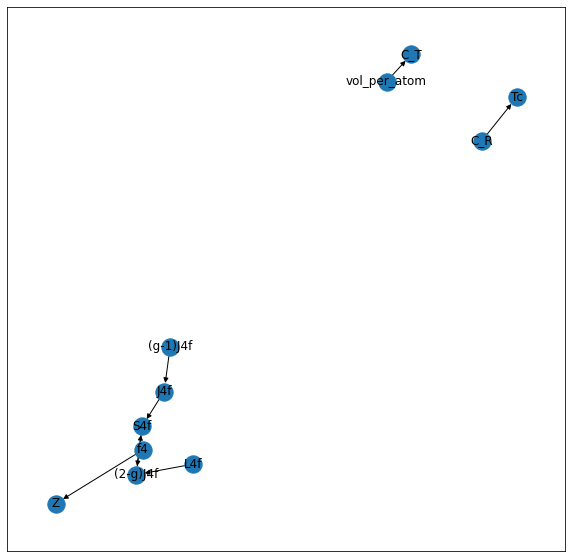

In [5]:
#エッジの計算と描画
import copy
import networkx as nx
import matplotlib.pyplot as plt

#directed_list =list( pdag.edges())
directed_list =list(model.edges())


check_list=copy.copy(directed_list)

for i in directed_list:
    check_list.append((i[1],i[0]))

undirected_list=list(skel.edges())


draw_edge_list=copy.copy(directed_list)
for directed in undirected_list:
    if not (directed in check_list):
        draw_edge_list.append((directed[0],directed[1]))
        draw_edge_list.append((directed[1],directed[0]))
    
    

g = nx.DiGraph()

#add node
for node_name in df.columns:
    g.add_node(node_name)
    

for i in draw_edge_list:
    g.add_edge(i[0],i[1])

#remove isolated nodes
isolated = [n for n in g.nodes if len([i for i in nx.all_neighbors(g, n)]) == 0]
g.remove_nodes_from(isolated)

#draw

plt.figure(figsize=(10,10))
nx.draw_networkx(g)